In [9]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
teams = pd.read_csv("./data/teams_updated.csv",index_col=0)

In [11]:
winners =  teams[teams["Rank"].isin(["1"])]
winner_counts = winners["Team"].value_counts().reset_index()
winner_counts.columns = ["Team","Wins"]
country_to_flag = {
    "USA": "🇺🇸",
    "Japan": "🇯🇵",
    "Brazil": "🇧🇷",
    "Sweden": "🇸🇪",
    "Norway": "🇳🇴",
    "Germany": "🇩🇪",
    "China": "🇨🇳",
    "Canada": "🇨🇦",
    "Australia": "🇦🇺",
    "England": "🏴󠁧󠁢󠁥󠁮󠁧󠁿",
    "France": "🇫🇷",
    "Spain": "🇪🇸",
    "Netherlands": "🇳🇱", 
}
winner_counts["Team"] = winner_counts["Team"].map(country_to_flag)
winner_counts = winner_counts.sort_values(by="Wins",ascending=False)
winner_counts

,Team,Wins
0,🇺🇸,4
1,🇩🇪,2
2,🇳🇴,1
3,🇯🇵,1
4,🇪🇸,1


In [12]:
fig_5_a = px.bar(winner_counts, x='Wins',
             y='Team',
             title = "World Cup Winners, 1991-2023",
             height=300
            )
fig_5_a.update_xaxes(title="",tickmode='linear', dtick=1)
fig_5_a.update_yaxes(title="")

fig_5_a.update_layout(
    title={
        "text": "USA leads the way <br><span style='font-size:16px;'>Number of World Cup Wins, 1991-2023 </span>",
        "font": {
            'size': 24,                   # Font size
            'color': "black",             # Font color
        },
    },
    font=dict(
        size=16,  # General font size
        color="black"  # Font color
    ),
    yaxis=dict(showgrid=True),
    template='plotly_white',
    showlegend=True,
    width=1000,
    height=600
)
fig_5_a.show()


In [13]:
df_rankings["Year"].astype(str)

NameError: name 'df_rankings' is not defined

In [ ]:
df_rankings.dtypes

Team    object
Rank    object
Year     int64
dtype: object

In [ ]:
teams.head()

,Rank,Team,MP,W,D,L,GF,GA,GD,Pts,...,Latitude,Longitude,Region,Year,ISO_Code,Manager,Gender,Nationality,Flag,Team_with_Flag
160,Quarter Final,China,4.0,2.0,1.0,1.0,10.0,4.0,6.0,5.0,...,35.8617,104.1954,AFC (Asia),1991,CHN,Shang Ruihua,Male,Chinese,🇨🇳,China 🇨🇳
161,Quarter Final,Italy,4.0,2.0,0.0,2.0,8.0,5.0,3.0,4.0,...,41.8719,12.5674,UEFA (Europe),1991,ITA,Sergio Guenza,Male,Italian,🇮🇹,Italy 🇮🇹
162,Quarter Final,Denmark,4.0,1.0,1.0,2.0,7.0,6.0,1.0,3.0,...,56.2639,9.5018,UEFA (Europe),1991,DNK,Keld Gantzhorn,Male,Danish,🇩🇰,Denmark 🇩🇰
163,Quarter Final,Taiwan,4.0,1.0,0.0,3.0,2.0,15.0,-13.0,2.0,...,23.6978,120.9605,AFC (Asia),1991,TWN,Chong Tsu-Pin,Male,Taiwanese,🇹🇼,Taiwan 🇹🇼
164,Group Stage,Brazil,3.0,1.0,0.0,2.0,1.0,7.0,-6.0,2.0,...,-14.2350,-51.9253,CONMEBOL (South America),1991,BRA,Fernando Pires,Male,Brazilian,🇧🇷,Brazil 🇧🇷


In [ ]:
teams["Rank"].value_counts()

Rank
Group Stage      72
Quarter Final    36
Round of 16      24
1                 9
2                 9
3                 9
4                 9
Name: count, dtype: int64

In [ ]:
team_names = sorted(teams["Team"].unique())
df_rankings = teams[["Team","Rank","Year"]]

df_rankings.head()

rank_order = [
    '1',
    '2',
    '3',
    '4',
    'Semi Final',
    'Quarter Final',
    'Round of 16',
    'Group Stage'
]

df_rankings['Rank'] = pd.Categorical(df_rankings['Rank'], categories=rank_order, ordered=True)

world_cup_years = list(range(1991, 2024, 4))  # Adjust as needed

China = df_rankings[df_rankings["Team"] == "China"]
China = China.set_index('Year').reindex(world_cup_years).reset_index()
sns.stripplot(data=China, x='Year', y='Rank', size=10, color='blue')
plt.xticks(China['Year'])

,Team,Rank,Year
160,China,Quarter Final,1991
161,Italy,Quarter Final,1991
162,Denmark,Quarter Final,1991
163,Taiwan,Quarter Final,1991
164,Brazil,Group Stage,1991


In [ ]:
rank_order = [
    '1',
    '2',
    '3',
    '4',
    'Semi Final',
    'Quarter Final',
    'Round of 16',
    'Group Stage'
]

df_rankings['Rank'] = pd.Categorical(df_rankings['Rank'], categories=rank_order, ordered=True)

world_cup_years = list(range(1991, 2024, 4))  # Adjust as needed

China = df_rankings[df_rankings["Team"] == "China"]
China = China.set_index('Year').reindex(world_cup_years).reset_index()
sns.stripplot(data=China, x='Year', y='Rank', size=10, color='blue')
plt.xticks(China['Year'])


/var/folders/d6/m_h9cxw94h55z5gr55prv6cr0000gn/T/ipykernel_6699/229046961.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
world_cup_years = list(range(1991, 2024, 4))  # Adjust as needed

China = df_rankings[df_rankings["Team"] == "China"]
China = China.set_index('Year').reindex(world_cup_years).reset_index()
sns.stripplot(data=China, x='Year', y='Rank', size=10, color='blue')
plt.xticks(China['Year'])


,Year,Team,Rank
0,1991,China,Quarter Final
1,1995,China,4
2,1999,China,2
3,2003,China,Quarter Final
4,2007,China,Quarter Final
5,2011,NaN,NaN
6,2015,China,Quarter Final
7,2019,China,Round of 16
8,2023,China,Group Stage


([<matplotlib.axis.XTick at 0x124f52ff0>,
 [Text(1991, 0, '1991'),
  Text(1995, 0, '1995'),
  Text(1999, 0, '1999'),
  Text(2003, 0, '2003'),
  Text(2007, 0, '2007'),
  Text(2011, 0, '2011'),
  Text(2015, 0, '2015'),
  Text(2019, 0, '2019'),
  Text(2023, 0, '2023')])

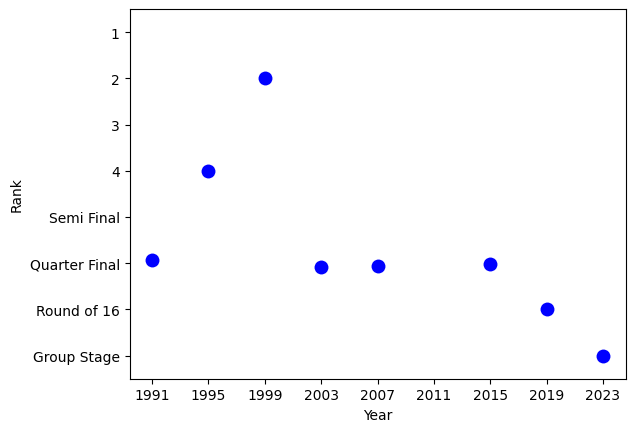

In [ ]:
sns.stripplot(data=China, x='Year', y='Rank', size=10, color='blue')
plt.xticks(China['Year'])

In [ ]:
rank_order = [
    '1',
    '2',
    '3',
    '4',
    'Semi Final',
    'Quarter Final',
    'Round of 16',
    'Group Stage'
]

df_rankings['Rank'] = pd.Categorical(df_rankings['Rank'], categories=rank_order, ordered=True)

world_cup_years = list(range(1991, 2024, 4))  

# Filter and reindex
China = df_rankings[df_rankings["Team"] == "China"]
China = China.set_index('Year').reindex(world_cup_years).reset_index()

# Reapply categorical ordering after reindexing
China['Rank'] = pd.Categorical(China['Rank'], categories=rank_order, ordered=True)

# Plot
fig = px.scatter(
    China,
    x='Year',
    y='Rank',
)

fig.update_traces(marker=dict(size=12, color='blue'), textposition='top center')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=world_cup_years,
        range=[1990, 2024]
    ),
    yaxis=dict(
        categoryorder='array',
        categoryarray=rank_order[::-1],
        tickmode='array',
        tickvals=rank_order[::-1],
        title='Rank'
    ),
    title="China's World Cup Placings Over Time"
)

fig.show()


/var/folders/d6/m_h9cxw94h55z5gr55prv6cr0000gn/T/ipykernel_6699/20792959.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

rank_order = [
    '1',
    '2',
    '3',
    '4',
    'Semi Final',
    'Quarter Final',
    'Round of 16',
    'Group Stage',
    'Did Not Qualify'   # Add DNQ at the bottom or wherever you prefer
]

world_cup_years = list(range(1991, 2024, 4))

# Filter team and reindex to all years
China = df_rankings[df_rankings["Team"] == "China"]
China = China.set_index('Year').reindex(world_cup_years).reset_index()

# Make Rank categorical with ordering
China['Rank'] = pd.Categorical(China['Rank'], categories=rank_order, ordered=True)

# Fill missing Rank with 'Did Not Qualify'
China['Rank'] = China['Rank'].fillna('Did Not Qualify')

# Add dummy row for each rank (invisible markers, alpha=0)
dummy = pd.DataFrame({
    'Year': [1991]*len(rank_order),
    'Rank': rank_order
})
dummy['dummy'] = True  # Flag to distinguish

# Combine with real data
China['dummy'] = False
plot_df = pd.concat([China, dummy], ignore_index=True)

# Make sure category type is preserved
plot_df['Rank'] = pd.Categorical(plot_df['Rank'], categories=rank_order, ordered=True)

colors = ['grey' if r == 'Did Not Qualify' else 'blue' for r in China['Rank']]

# Plot
fig = px.scatter(
    China,
    x='Year',
    y='Rank',
)
fig.add_trace(
    px.scatter(
        plot_df[plot_df['dummy'] == True],
        x='Year',
        y='Rank',
        opacity=0  # Invisible!
    ).data[0]
)


fig.update_traces(marker=dict(size=12, color=colors), textposition='top center')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=world_cup_years,
        range=[1990, 2024],
        title='World Cup Year'
    ),
    yaxis=dict(
        categoryorder='array',
        categoryarray=rank_order[::-1],  # '1' at top, 'Did Not Qualify' at bottom
        tickmode='array',
        tickvals=rank_order[::-1],
    ),
    title="China's World Cup Placings Over Time",
    showlegend=False
)

fig.show()


In [ ]:
# Dummy input data (replace with your actual df)
teams = pd.DataFrame({
    'Team': ['China', 'China', 'China', 'USA', 'USA'],
    'Year': [1991, 1995, 2019, 1991, 1999],
    'Rank': ['Semi Final', 'Quarter Final', 'Round of 16', '1', '1']
})

team_names = sorted(teams["Team"].unique())

selected_team = st.selectbox("Choose a team", team_names)

rank_order = [
    '1',
    '2',
    '3',
    '4',
    'Semi Final',
    'Quarter Final',
    'Round of 16',
    'Group Stage',
    'Did Not Qualify'
]

world_cup_years = list(range(1991, 2024, 4))

# Filter and reindex
team = teams[teams["Team"] == selected_team].set_index('Year').reindex(world_cup_years).reset_index()
team['Team'] = selected_team  # Fill missing Team
team['Rank'] = pd.Categorical(team['Rank'], categories=rank_order, ordered=True)
team['Rank'] = team['Rank'].fillna('Did Not Qualify')

# Dummy rows to force y-axis categories display
dummy = pd.DataFrame({
    'Year': [world_cup_years[0]] * len(rank_order),
    'Rank': rank_order,
    'Team': [selected_team] * len(rank_order),
    'dummy': True
})

team['dummy'] = False

plot_df = pd.concat([team, dummy], ignore_index=True)
plot_df['Rank'] = pd.Categorical(plot_df['Rank'], categories=rank_order, ordered=True)

# Assign colors only for real data points
real_data = plot_df[plot_df['dummy'] == False]
colors = ['grey' if r == 'Did Not Qualify' else 'red' for r in real_data['Rank']]

# Plot real points
fig = px.scatter(
    real_data,
    x='Year',
    y='Rank',
    text='Rank'
)

# Add dummy points invisibly
dummy_data = plot_df[plot_df['dummy'] == True]
fig.add_trace(
    px.scatter(
        dummy_data,
        x='Year',
        y='Rank',
        opacity=0
    ).data[0]
)

fig.update_traces(marker=dict(size=12, color=colors), textposition='top center')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=world_cup_years,
        range=[min(world_cup_years) - 1, max(world_cup_years) + 1],
        title='World Cup Year'
    ),
    yaxis=dict(
        categoryorder='array',
        categoryarray=rank_order[::-1],  # Top rank '1' at top
        tickmode='array',
        tickvals=rank_order[::-1],
        title='Rank'
    ),
    title=f"{selected_team}'s World Cup Placings Over Time",
    showlegend=False
)

st.plotly_chart(fig, use_container_width=True)

NameError: name 'st' is not defined

In [ ]:
teams = pd.read_csv("data/teams_updated.csv",index_col=0)
teams["Year"] = teams["Year"].astype(str)

In [ ]:
teams_filtered = teams[teams['Rank'].isin(['1', '2', '3', '4'])]  
team_counts = teams_filtered['Team']\
                .value_counts()\
                .reset_index()\
                .columns = ['Team', 'Times_in_Top_4']

team_counts

['Team', 'Times_in_Top_4']

In [ ]:
team_counts = teams_filtered["Team"].value_counts()\
    .reset_index()\
    .rename(columns = {"Team":"Team","count":"Times_in_top_4"})




In [ ]:
country_to_flag = {
    "USA": "USA🇺🇸",
    "Japan": "Japan 🇯🇵",
    "Brazil": "Brazil 🇧🇷",
    "Sweden": "Sweden 🇸🇪",
    "Norway": "Norway 🇳🇴",
    "Germany": "Germany🇩🇪",
    "China": "China 🇨🇳",
    "Canada": "Canada 🇨🇦",
    "Australia": "Australia 🇦🇺",
    "England": "England 🏴󠁧󠁢󠁥󠁮󠁧󠁿",
    "France": "France 🇫🇷",
    "Spain": "Spain 🇪🇸",
    "Netherlands": "Netherlands 🇳🇱", 
}
country_to_region = {
    "USA": "CONCACAF (North and Central America)",
    "Japan": "AFC (Asia)",
    "Brazil": "CONMEBOL (South America)",
    "Sweden": "UEFA (Europe)",
    "Norway": "UEFA (Europe)",
    "Germany": "UEFA (Europe)",
    "China": "AFC (Asia)",
    "Canada": "CONCACAF (North and Central America)",
    "Australia": "AFC (Asia)",
    "England": "UEFA (Europe)",
    "France": "UEFA (Europe)",
    "Spain": "UEFA (Europe)",
    "Netherlands": "UEFA (Europe)", 
}
team_counts["Region"] = team_counts["Team"].map(country_to_region)
team_counts["Country_Flag"] = team_counts["Team"].map(country_to_flag)

In [ ]:
team_counts

,Team,Times_in_top_4,Region,Country_Flag
0,USA,8,CONCACAF (North and Central America),USA🇺🇸
1,Sweden,5,UEFA (Europe),Sweden 🇸🇪
2,Germany,5,UEFA (Europe),Germany🇩🇪
3,Norway,4,UEFA (Europe),Norway 🇳🇴
4,England,3,UEFA (Europe),England 🏴󠁧󠁢󠁥󠁮󠁧󠁿
5,China,2,AFC (Asia),China 🇨🇳
6,Brazil,2,CONMEBOL (South America),Brazil 🇧🇷
7,Japan,2,AFC (Asia),Japan 🇯🇵
8,Canada,1,CONCACAF (North and Central America),Canada 🇨🇦
9,France,1,UEFA (Europe),France 🇫🇷


In [ ]:


region_colors = {
    "UEFA (Europe)": "#003366",  # Dark Blue
    "CONCACAF (North and Central America)": "#FFA500",  # Orange
    "AFC (Asia)": "#FFD700",  # Yellow
    "CAF (Africa)": "#ADD8E6",  # Light Blue
    "CONMEBOL (South America)": "#008000",  # Green
    "OFC (Oceania)": "#800080" 
}

# Create a bar plot for the most successful teams
fig_5 = px.bar(team_counts, 
             x="Times_in_top_4",
             y="Country_Flag", 
             color="Region", 
             hover_name = "Team",
             labels={"Times_in_top_4": "Number of Top 4 Placings"},
             color_discrete_map=region_colors,
             hover_data = {"Team":False,"Country_Flag":False},
             category_orders={"Country_Flag": team_counts["Country_Flag"].tolist()},
             orientation="h"
)

fig_5.update_layout(
    font=dict(
        family="Helvetica",  # Font style
        size=16,  # General font size
        color="black"  # Font color
    ),
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=True),
    template='plotly_white',
    showlegend=True,
    legend=dict(
        orientation="h",  
        yanchor="bottom",  
        y=1.02,            
        xanchor="left",  
                     
    ),
    margin=dict(t=50),
    width=1200,
    height=500,
    xaxis_title="",
    yaxis_title="",
    bargap=0.2
)



In [ ]:
winner_counts = teams[teams["Rank"].isin(["1"])]\
    ["Team"].value_counts() \
    .reset_index()\
    .rename(columns={"Team":"Team","count":"Wins"})

winner_counts["Country_Flag"] = winner_counts["Team"].map(country_to_flag)

winner_counts
    


,Team,Wins,Country_Flag
0,USA,4,USA🇺🇸
1,Germany,2,Germany🇩🇪
2,Norway,1,Norway 🇳🇴
3,Japan,1,Japan 🇯🇵
4,Spain,1,Spain 🇪🇸


In [ ]:

fig_5_a = px.bar(winner_counts, x='Wins',
             y='Country_Flag',
             category_orders={"Country_Flag": winner_counts["Country_Flag"].tolist()}
            )
fig_5_a.update_xaxes(title="",tickmode='linear', dtick=1)

fig_5_a.update_layout(
    font=dict(
        family="Helvetica",  # Font style
        size=16,  # General font size
        color="black"  # Font color
    ),
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=True),
    template='plotly_white',
    showlegend=True,
    legend=dict(
        orientation="h",  
        yanchor="bottom",  
        y=1.02,            
        xanchor="left",  
                     
    ),
    margin=dict(t=50),
    width=1200,
    height=500,
    xaxis_title="",
    yaxis_title="",
    bargap=0.2
)



In [ ]:
fig_5_a = px.bar(winner_counts, x='Wins',
             y='Team',
             height=300
            )
fig_5_a.update_xaxes(title="",tickmode='linear', dtick=1)
fig_5_a.update_yaxes(tickfont=dict(size=20))

fig_5_a.update_layout(
    yaxis=dict(showgrid=True),
    template='plotly_white',
    showlegend=True,
    width=1000,
    height=600
)

st.plotly_chart(fig_5_a,use_container_width=True)


  What have been the matches with the biggest scoreline differentials? 

In [32]:
matches = pd.read_csv("data/matches.csv",index_col=0)

matches["goal_difference"] = (matches['home_score'] - matches['away_score']).abs()

thrashings = matches[matches["goal_difference"] > 3]\
            .groupby("Year").size()

total_games = matches.groupby("Year").size()
share_thrashings = (thrashings/ total_games * 100.0).round(2).reset_index()
share_thrashings.columns = ["Year","Thrashing_Rate"]





In [33]:


fig_6 = px.line(share_thrashings,
              x='Year',
              y='Thrashing_Rate',
              title='Thrashings per tournament (%)',
              labels={"Thrashing_Rate":"Thrashings(%)"},
              hover_data = {"Thrashing_Rate": True,'Year': False},
              hover_name="Year"
             )
fig_6.update_traces(mode='lines+markers', marker=dict(size=8, color='#2a76d9'))
fig_6.update_layout(
    title={
        "text": "How competitive are games at the WWC?<br><span style='font-size:14px; font-weight:normal; color:gray;'>Thrashings per tournament(%)</span>",
        "font": {
            'family': "Helvetica-Bold",  
            'size': 18,                   
            'color': "black",             
        },
         "x": 0, 
        "xanchor": "left" 
    },
    font=dict(
        family="Helvetica",  
        size=14,  
        color="black" 
    ),
    template='plotly_white',
    showlegend=True,
    width=600,
    height=400,
    yaxis_title="",
    yaxis=dict(showgrid=True),
    xaxis=dict(showgrid=False)
)
fig_6.update_xaxes(title='',tickmode='array', tickvals=[1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023])
fig_6.update_yaxes(title='Percentage',tickmode='array', tickvals=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])



In [ ]:
matches[matches["goal_difference"] == matches["goal_difference"].max()]

,home_team,away_team,home_score,away_score,home_manager,away_manager,Attendance,Venue,Round,Date,Score,Referee,Host,Year,home_goal,away_goal,home_penalty_goal,away_penalty_goal,goal_difference
106,United States,Thailand,13,0,Jill Ellis,Noengruthai Sratongwian,18591,"Stade Auguste-Delaune II, Reims",Group stage,2019-06-11,13–0,Jeanne Niang,France,2019,Alex Morgan · 12’|Rose Lavelle · 20’|Lindsey H...,NaN,NaN,NaN,13


In [17]:
goal_diff = matches.groupby("Year")["goal_difference"].mean().round(1).reset_index()
goal_diff

,Year,goal_difference
0,1991,2.8
1,1995,2.3
2,1999,2.4
3,2003,2.4
4,2007,2.3
5,2011,1.4
6,2015,1.7
7,2019,1.9
8,2023,1.8


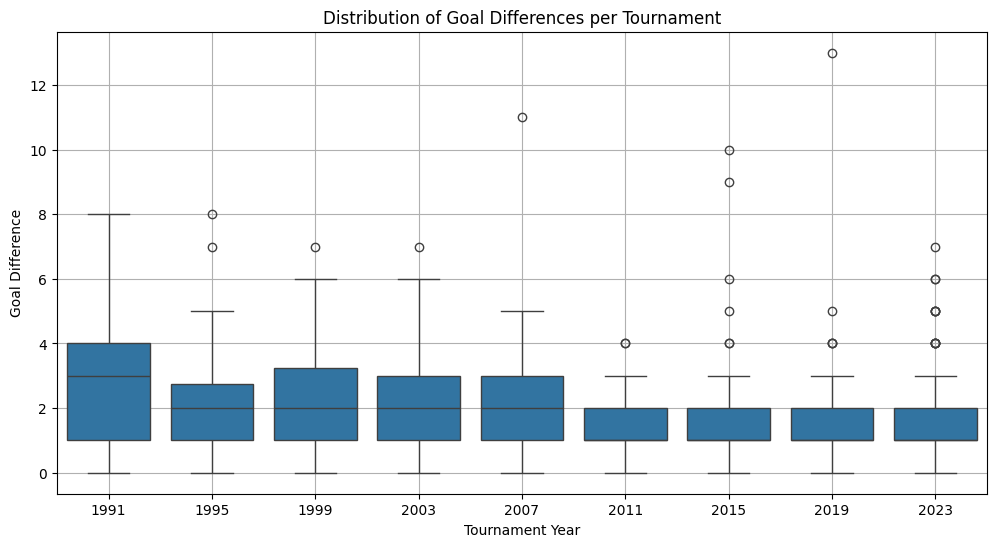

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='goal_difference', data=matches)
plt.title('Distribution of Goal Differences per Tournament')
plt.xlabel('Tournament Year')
plt.ylabel('Goal Difference')
plt.grid(True)
plt.show()